In [1]:
# Módulos importados para o funcionamento deste código;

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso

In [2]:
# Linha que imorta o arquivo que contém o dataset;

dados = pd.read_csv('Dataset_Final.csv')

In [3]:
# Código para embaralhar as linhas do dataset;

dados = shuffle(dados)

In [5]:
# Colunas com os dados que serão analisados pelas regressões;

atributos = ["Idade", "Qualidade", "Potencial","Preço", "Especial", "Drible", "Finalização", "Marcação", "Visão", "Interceptação"
             , "Cruzamento", "Bote", "Posicionamento", "Cabeceio"]
y = ["Salário"]

In [6]:
# Limpar o dataset;

for i in atributos:
    dados = dados[dados[i] != 0] 
dados = dados.dropna()


# Separa o dataset, 80% para treinamento e 20% para teste;

train, test = train_test_split(dados, test_size=0.2)


In [7]:
# Função que realiza a regressão Ridge;

def ridge_regression(train, atributos, alpha):
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(train[atributos],train['Salário'])
    y_pred = ridgereg.predict(train[atributos])
    return(y_pred)

In [8]:
# Estudo para escolher o melhor alpha para a regressão;

alphas = [10, 5, 2, 1, 0.01, 0.001, 0.0001, 1e-10, 1e-15]

for valor in alphas:
    Regressão_Ridge = ridge_regression(train, atributos, valor)
    print((mean_squared_error(train['Salário'],Regressão_Ridge))**(1/2))

20153.6895204
19104.0661963
17692.1481688
16886.253984
16102.5792625
16101.1121693
16101.0903969
16101.0901665
16101.0901665


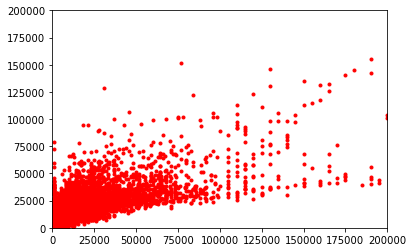

In [15]:
# Uso do melhor alpha para fazer o gráfico;

R_R = ridge_regression(train, atributos, 0.001)
plt.plot(train['Salário'],R_R,'.', color="red")
plt.axis([0, 200000, 0, 200000])
plt.show()

In [10]:
# Função que realiza a regressão Lasso;

def lasso_regression(train, atributos, alpha):
    lassoreg = Lasso(alpha=alpha,normalize=True)
    lassoreg.fit(train[atributos],train['Salário'])
    y_predl = lassoreg.predict(train[atributos])
    return(y_predl)

In [18]:
# Estudo para escolher o melhor alpha para a regressão;

alphas = [10, 5, 2, 1, 0.01, 0.001, 0.0001]

for valor in alphas:
    Regressão_Lasso = lasso_regression(train, atributos, valor)
    print((mean_squared_error(train['Salário'],Regressão_Lasso))**(1/2))

16187.6379866
16140.8944928
16123.5783157
16118.883845
16101.0959845
16101.0902249
16101.0901671


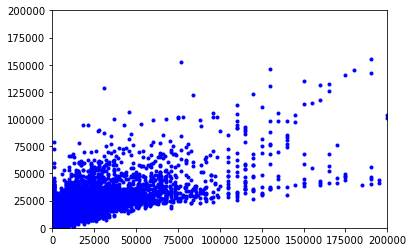

In [20]:
# Uso do melhor alpha para fazer o gráfico;

R_L = lasso_regression(train, atributos, 0.01)
plt.plot(train['Salário'],R_L,'.', color="blue")
plt.axis([0, 200000, 0, 200000])
plt.show()

In [22]:
# Uso dos conhecimentos obtidos durante o treino para realizar o teste de regressão Ridge;

alpha = 0.001

r_R = ridge_regression(test, atributos, alpha)
print((mean_squared_error(test['Salário'],r_R))**(1/2))

18024.25413


In [23]:
# Uso dos conhecimentos obtidos durante o treino para realizar o teste de regressão Lasso; 

alpha = 0.01

r_L = lasso_regression(test, atributos, alpha)
print((mean_squared_error(test['Salário'],r_L))**(1/2))

18024.221664
